## Q1

In [1]:
from sympy import Polygon, Line, Segment, Point

def make_Polygon(poly):
    if not isinstance(poly, Polygon):
        return Polygon(*poly)
    else:
        return poly

### Environment Plot

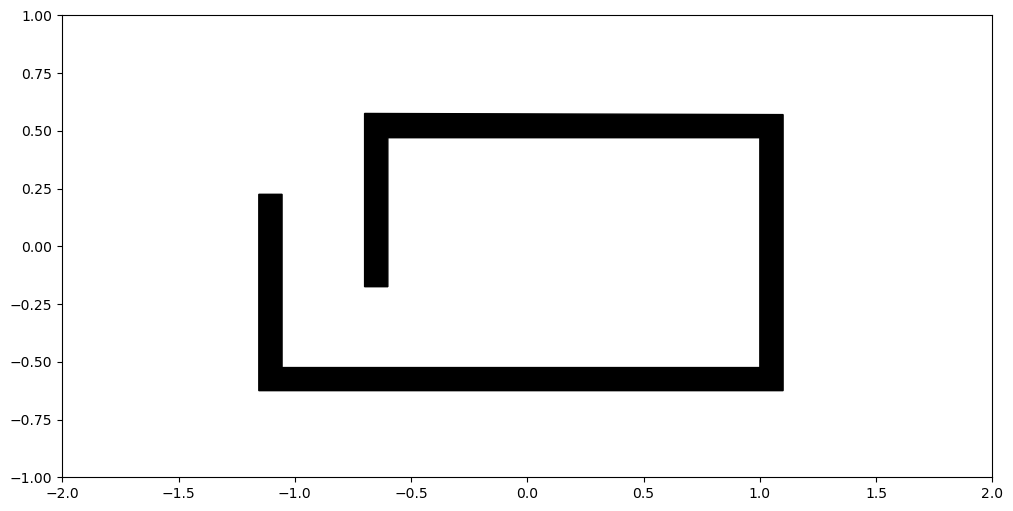

In [2]:
import matplotlib.pyplot as plt

environment = make_Polygon(((-1.155, 0.225), (-1.055, 0.225), (-1.055, -0.525), (1.000, -0.525), (1.000, 0.470), (-0.600, 0.470),
                            (-0.600, -0.175), (-0.700, -0.175), (-0.700, 0.575), (1.100, 0.570), (1.100, -0.625), (-1.155, -0.625)))

fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.show()


### Lawnmower Pattern

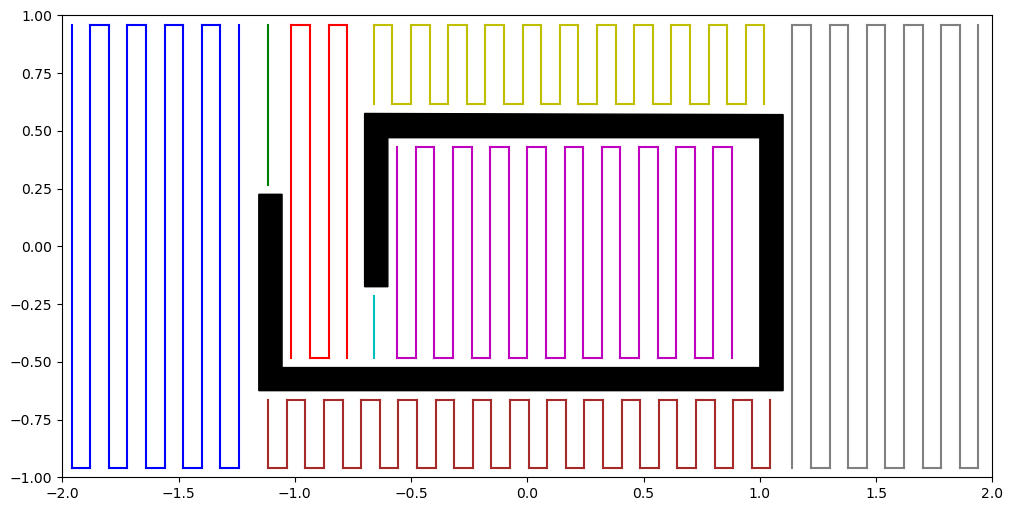

In [3]:
import numpy as np

trapezoids = [
    Polygon((-2, -1), (-2, 1), (-1.155, 1), (-1.155, -1)),
    Polygon((-1.155, 1), (-1.155, 0.225), (-1.055, 0.225), (-1.055, 1)),
    Polygon((-1.055, 1), (-1.055, -0.525), (-0.700, -0.525), (-0.700, 1)),
    Polygon((-0.700, -0.525), (-0.700, -0.175),
            (-0.600, -0.175), (-0.600, -0.525)),
    Polygon((-0.600, -0.525), (-0.600, 0.470),
            (1.000, 0.470), (1.000, -0.525)),
    Polygon((-0.700, 1), (-0.700, 0.575),
            (1.100, 0.575), (1.100, 1)),
    Polygon((1.100, 1), (1.100, -1), (2, -1), (2, 1)),
    Polygon((1.100, -1), (1.100, -0.625), (-1.155, -0.625), (-1.155, -1))
]

def plot_lawnmower_pattern(environment, trapezoids, sensing_diameter):
    fig, ax = plt.subplots(figsize=(12, 6))
    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'grey', 'brown']
    for c, poly in enumerate(trapezoids):
        max_x0 = max([float(p.x) for p in poly.sides[0].points])
        max_x2 = max([float(p.x) for p in poly.sides[2].points])
        x_list = np.arange(min(max_x0, max_x2)+sensing_diameter/2,
                           max(max_x0, max_x2)-sensing_diameter/2, sensing_diameter)
        if len(x_list) == 0:
            pass
        else:
            coeffs_1 = Line(poly.sides[1]).coefficients
            y_list_1 = [((-coeffs_1[0]*x - coeffs_1[2])/coeffs_1[1])
                        for x in x_list]
            coeffs_3 = Line(poly.sides[3]).coefficients
            y_list_3 = [((-coeffs_3[0]*x - coeffs_3[2])/coeffs_3[1])
                        for x in x_list]
            if y_list_3[0] <= y_list_1[0]:
                for i in range(len(x_list)):
                    y_list_3[i] += sensing_diameter/2
                    y_list_1[i] -= sensing_diameter/2
            else:
                for i in range(len(x_list)):
                    y_list_3[i] -= sensing_diameter/2
                    y_list_1[i] += sensing_diameter/2
            segments = []
            for i in range(len(x_list)):
                x = x_list[i]
                segments.append(
                    Segment(Point(x, y_list_1[i]), Point(x, y_list_3[i])))
                if i % 2 == 0 and i != (len(x_list)-1):
                    segments.append(
                        Segment(Point(x_list[i], y_list_3[i]), Point(x_list[i+1], y_list_3[i+1])))
                elif i % 2 != 0 and i != (len(x_list)-1):
                    segments.append(
                        Segment(Point(x_list[i], y_list_1[i]), Point(x_list[i+1], y_list_1[i+1])))
            for segment in segments:
                plt.plot([segment.p1.x, segment.p2.x], [
                         segment.p1.y, segment.p2.y], color=colours[c])

    plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
        environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

    ax.set_xlim([-2, 2])
    ax.set_ylim([-1, 1])

    plt.show()


plot_lawnmower_pattern(environment, trapezoids, 0.08)

### Distance Travelled, Turns taken in each Cell

In [4]:
def lawnmower_pattern_distace_turns(environment, trapezoids, sensing_diameter):
    ans=[]
    for c, poly in enumerate(trapezoids):
        max_x0 = max([float(p.x) for p in poly.sides[0].points])
        max_x2 = max([float(p.x) for p in poly.sides[2].points])
        x_list = np.arange(min(max_x0, max_x2)+sensing_diameter/2,
                           max(max_x0, max_x2)-sensing_diameter/2, sensing_diameter)
        if len(x_list) == 0:
            pass
        else:
            coeffs_1 = Line(poly.sides[1]).coefficients
            y_list_1 = [((-coeffs_1[0]*x - coeffs_1[2])/coeffs_1[1])
                        for x in x_list]
            coeffs_3 = Line(poly.sides[3]).coefficients
            y_list_3 = [((-coeffs_3[0]*x - coeffs_3[2])/coeffs_3[1])
                        for x in x_list]
            if y_list_3[0] <= y_list_1[0]:
                for i in range(len(x_list)):
                    y_list_3[i] += sensing_diameter/2
                    y_list_1[i] -= sensing_diameter/2
            else:
                for i in range(len(x_list)):
                    y_list_3[i] -= sensing_diameter/2
                    y_list_1[i] += sensing_diameter/2
            segments = []
            for i in range(len(x_list)):
                x = x_list[i]
                segments.append(
                    Segment(Point(x, y_list_1[i]), Point(x, y_list_3[i])))
                if i % 2 == 0 and i != (len(x_list)-1):
                    segments.append(
                        Segment(Point(x_list[i], y_list_3[i]), Point(x_list[i+1], y_list_3[i+1])))
                elif i % 2 != 0 and i != (len(x_list)-1):
                    segments.append(
                        Segment(Point(x_list[i], y_list_1[i]), Point(x_list[i+1], y_list_1[i+1])))
            sum=0
            for segment in segments:
                sum+=segment.length
            ans.append([sum, 2*len(x_list)-2])

    return ans

lawnmower_pattern_distace_turns(environment, trapezoids, 0.08)


[[498/25, 18],
 [139/200, 0],
 [301/50, 6],
 [27/100, 0],
 [753/40, 36],
 [927/100, 42],
 [548/25, 20],
 [521/50, 54]]

## Q2

### Trapezoidal Decomposition

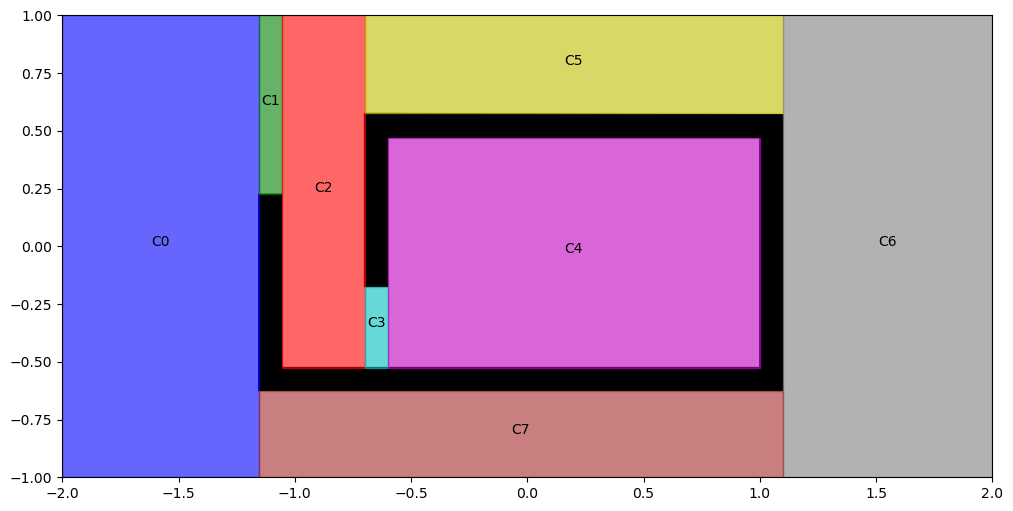

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

colours = ['b', 'g', 'r', 'c', 'm', 'y', 'grey', 'brown']
for i, poly in enumerate(trapezoids):
    plt.fill([poly.vertices[i].x for i in range(len(poly.vertices))], [
             poly.vertices[i].y for i in range(len(poly.vertices))], color=colours[i], alpha=0.6)
    ax.annotate(f'C{i}', (poly.centroid.x - 0.04, poly.centroid.y))

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.show()


### Old Start Point

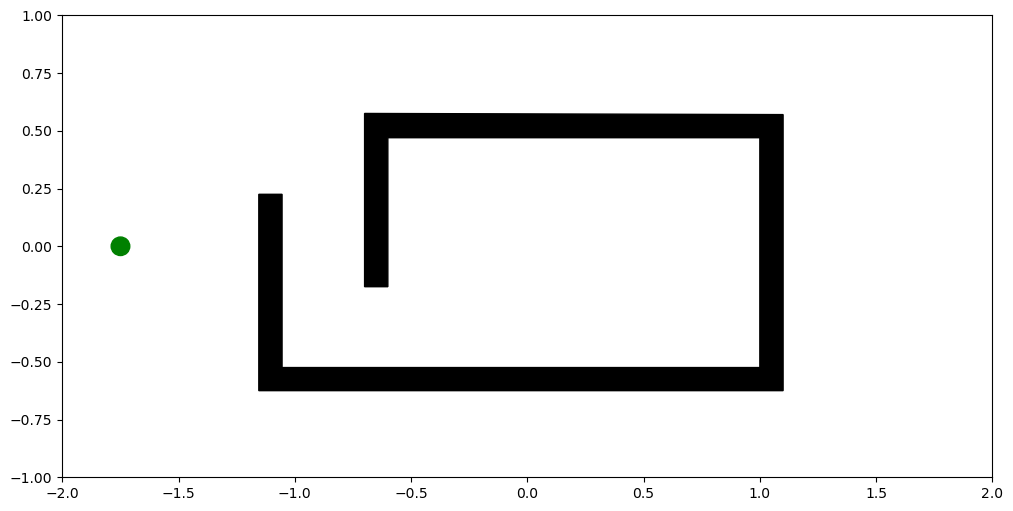

In [6]:
from matplotlib import patches

fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')
start = patches.Circle((-1.75,0), radius=0.04, color='green')
ax.add_patch(start)
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.show()

### New Start Point

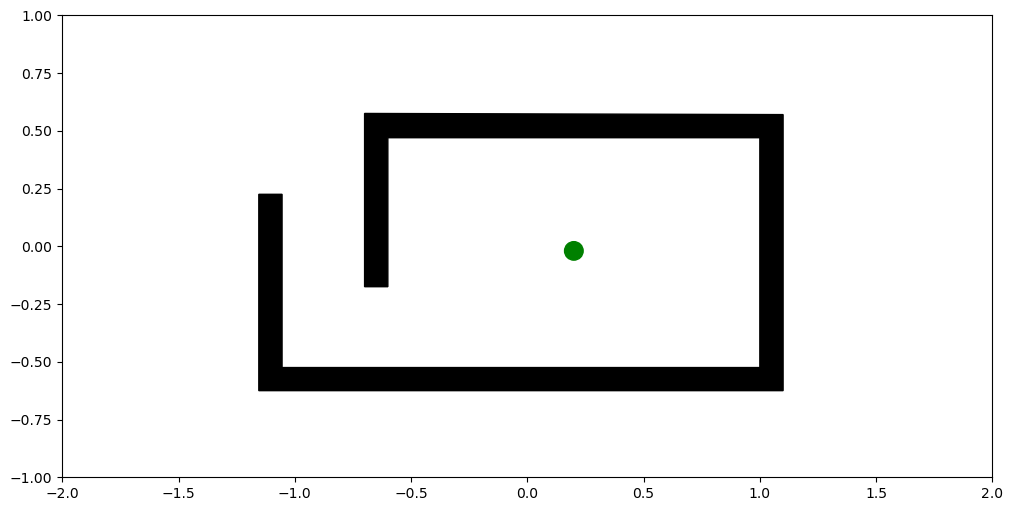

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')
start = patches.Circle((0.2,-0.02), radius=0.04, color='green')
ax.add_patch(start)
ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.show()

## Q3

### Visibility Graph

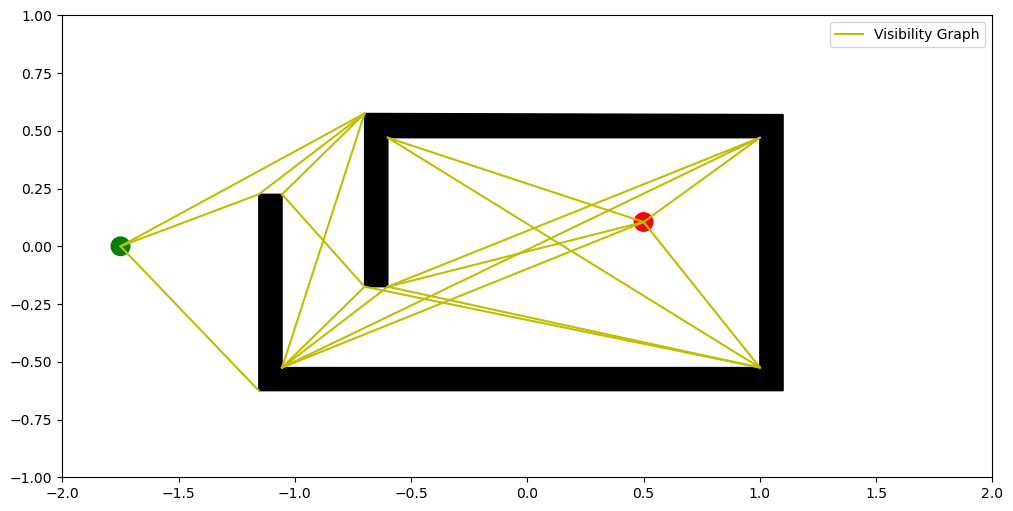

In [8]:
def plot_visibility_graph():
    point1 = [-1.75, 0]
    point2 = [-1.155, -0.625]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [-1.75, 0]
    point2 = [-0.700, 0.575]
    point3 = [-1.055, -0.525]
    point4 = [1.000, 0.470]
    point5 = [-0.600, -0.175]
    point6 = [1.000, -0.525]
    point7 = [-0.600, 0.470]
    x_values = [point1[0], point2[0],point3[0],point4[0], point5[0],point6[0],point7[0]]
    y_values = [point1[1], point2[1], point3[1],point4[1], point5[1], point6[1],point7[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-", label = 'Visibility Graph')

    point1 = [-0.700, 0.575]
    point2 = [-1.155, 0.225]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [-0.700, 0.575]
    point2 = [-1.055, 0.225]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [-1.055, -0.525]
    point2 = [-0.700, -0.175]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [-1.055, -0.525]
    point2 = [-0.600, -0.175]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [-1.055, -0.525]
    point2 = [0.500, 0.105]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [1.000, -0.525]
    point2 = [0.500, 0.105]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [1.000, 0.470]
    point2 = [0.500, 0.105]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [-0.600, 0.470]
    point2 = [0.500, 0.105]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [1.000, -0.525]
    point2 = [-0.700, -0.175]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [-1.75, 0]
    point2 = [-1.155, 0.225]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [-1.055,0.225]
    point2 = [-0.700, -0.175]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    point1 = [-0.600, -0.175]
    point2 = [0.500, 0.105]
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    plt.plot(x_values, y_values, 'y', linestyle="-")

    start = patches.Circle((-1.75,0), radius=0.04, color='green')
    goal = patches.Circle([0.500, 0.105], radius=0.04, color='Red')
    ax.add_patch(start)
    ax.add_patch(goal)

fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

plot_visibility_graph()

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.legend()
plt.show()

### Manual Shortest Path in Visibility Graph

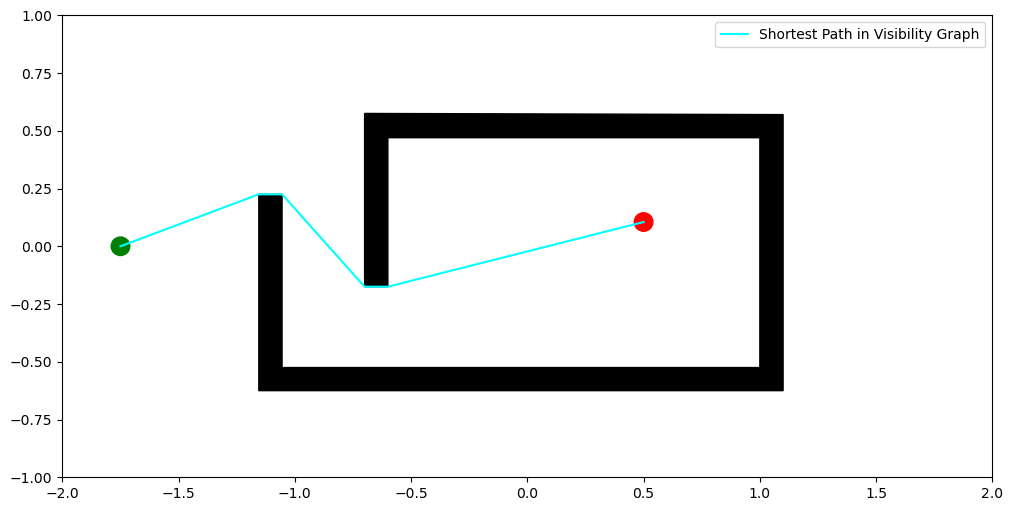

In [9]:
def plot_manual_shortest_path_in_visibility_graph():
    point1 = [-1.75, 0]
    point2 = [-1.155, 0.225]
    point3 = [-1.055,0.225]
    point4 = [-0.700, -0.175]
    point5 = [-0.600, -0.175]
    point6 = [0.500, 0.105]
    x_values = [point1[0], point2[0],point3[0],point4[0], point5[0],point6[0]]
    y_values = [point1[1], point2[1], point3[1],point4[1], point5[1], point6[1]]
    plt.plot(x_values, y_values, 'cyan', linestyle="-",label = 'Shortest Path in Visibility Graph')

    start = patches.Circle((-1.75,0), radius=0.04, color='green')
    goal = patches.Circle([0.500, 0.105], radius=0.04, color='Red')
    ax.add_patch(start)
    ax.add_patch(goal)

fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

plot_manual_shortest_path_in_visibility_graph()

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.legend()
plt.show()

### Bug0 Path

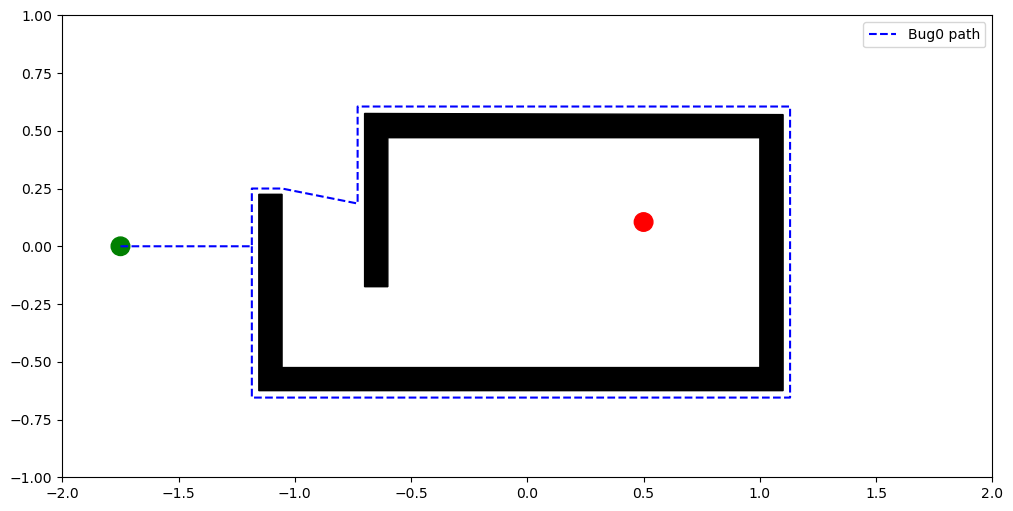

In [10]:
def plot_bug0_path():
    point1 = [-1.75, 0]
    point2 = [-1.185, 0]
    point3 = [-1.185, 0.250]
    point4 = [-1.055,0.250]
    point5 = [-0.730,0.185]
    point6 = [-0.730,0.605]
    point7 = [1.130,0.605]
    point8 = [1.130,-0.655]
    point9 = [-1.185,-0.655]
    x_values = [point1[0], point2[0],point3[0],point4[0], point5[0],point6[0],point7[0], point8[0],point9[0],point2[0]]
    y_values = [point1[1], point2[1], point3[1],point4[1], point5[1], point6[1],point7[1], point8[1],point9[1],point2[1]]
    plt.plot(x_values, y_values, 'b', linestyle="--", label = 'Bug0 path')

    start = patches.Circle((-1.75,0), radius=0.04, color='green')
    goal = patches.Circle([0.500, 0.105], radius=0.04, color='Red')
    ax.add_patch(start)
    ax.add_patch(goal)

fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

plot_bug0_path()

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.legend()
plt.show()

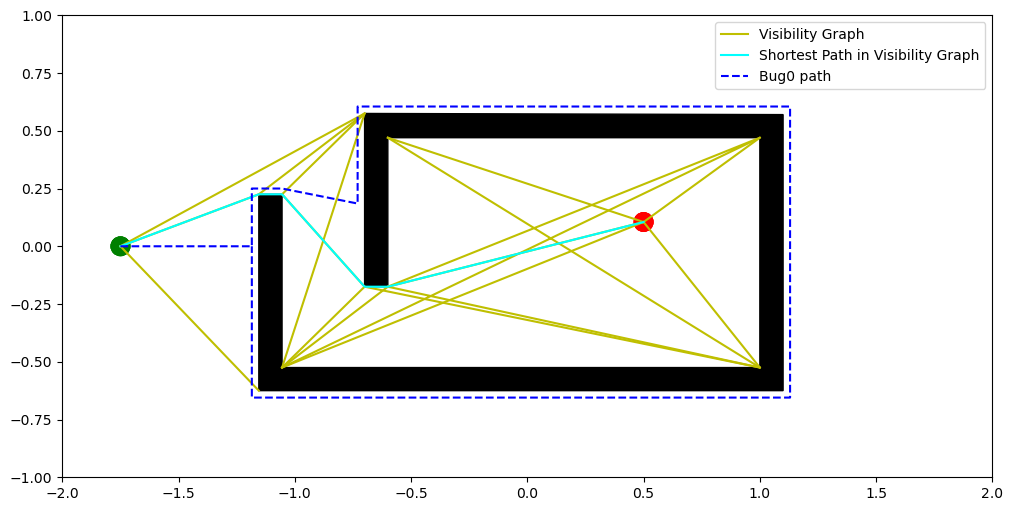

In [11]:
fig, ax = plt.subplots(figsize=(12, 6))

plt.fill([environment.vertices[i].x for i in range(len(environment.vertices))], [
         environment.vertices[i].y for i in range(len(environment.vertices))], color='black')

plot_visibility_graph()
plot_manual_shortest_path_in_visibility_graph()
plot_bug0_path()

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 1])

plt.legend()
plt.show()

### Q7

In [15]:
a=[-1.75, 0]
b=[-1.155, 0.225]
c=[-1.055, 0.225]
d=[-1.055, -0.525]
e=[1.000, -0.525]
f=[1.000, 0.470]
g=[-0.600, 0.470]
h=[-0.600, -0.175]
i=[-0.700, -0.175]
j=[-0.700, 0.575]
k=[0.500, 0.105]

def heuristic(n):
    H_dist = {
        'A': 1,
        'B': 1,
        'C': 1,
        'D': 1,
        'E': 1,
        'F': 1,
        'G': 1,
        'H': 1,
        'I': 1,
        'J': 1,
        'K': 1
    }
    return H_dist[n]

#Describe your graph here
Graph_nodes = {
    'A': [('B', 0.636), ('J', 1.197)],
    'B': [('A', 0.636), ('C', 0.1), ('J', 0.574)],
    'C': [('B', 0.1), ('D', 0.75), ('I', 0.534),('J', 0.498)],
    'D': [('E', 2.055), ('C', 0.75), ('J', 1.155),('H', 0.574), ('I', 0.498), ('F', 2.283), ('K', 1.677)],
    'E': [('D', 2.055), ('H', 1.637), ('I', 1.735), ('G', 1.884),('K', 0.804), ('F', 0.995)],
    'F': [('E', 0.995), ('G', 1.6), ('H', 1.725),('D', 2.283), ('K', 0.619)],
    'G': [('H', 0.645), ('F', 1.6),('E', 1.884), ('K', 1.158)],
    'H': [('E', 1.637), ('F', 1.725),('K', 1.135), ('G', 0.645),('I', 0.1), ('D', 0.574)],
    'I': [('H', 0.1), ('E', 1.735), ('J', 0.75), ('D', 0.498),('C', 0.534)],
    'J': [('A', 1.197), ('B', 0.574), ('C', 0.498),('D', 1.155), ('I', 0.75)],
    'K': [('H', 1.135), ('E', 0.804), ('D', 1.677),('F', 0.619), ('G', 1.158)],
}

def aStarAlgo(start_node, stop_node):
    open_set = set(start_node)
    closed_set = set()
    g = {}               #store distance from starting node
    parents = {}         # parents contains an adjacency map of all nodes
    #distance of starting node from itself is zero
    g[start_node] = 0
    #start_node is root node i.e it has no parent nodes
    #so start_node is set to its own parent node
    parents[start_node] = start_node
    while len(open_set) > 0:
        n = None
        #node with lowest f() is found
        for v in open_set:
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v
        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n):
                #nodes 'm' not in first and last set are added to first
                #n is set its parent
                if m not in open_set and m not in closed_set:
                    open_set.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight
                #for each node m,compare its distance from start i.e g(m) to the
                #from start through n node
                else:
                    if g[m] > g[n] + weight:
                        #update g(m)
                        g[m] = g[n] + weight
                        #change parent of m to n
                        parents[m] = n
                        #if m in closed set,remove and add to open
                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)
        if n == None:
            print('Path does not exist!')
            return None
        
        # if the current node is the stop_node
        # then we begin reconstructin the path from it to the start_node
        if n == stop_node:
            path = []
            while parents[n] != n:
                path.append(n)
                n = parents[n]
            path.append(start_node)
            path.reverse()
            print('Path found: {}'.format(path))
            return path
        # remove n from the open_list, and add it to closed_list
        # because all of his neighbors were inspected
        open_set.remove(n)
        closed_set.add(n)
    print('Path does not exist!')
    return None

#define fuction to return neighbor and its distance
#from the passed node
def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None

aStarAlgo('A', 'K')

Path found: ['A', 'B', 'C', 'I', 'H', 'K']


['A', 'B', 'C', 'I', 'H', 'K']

### Q4

Parameters Used: α = 50, β = 50, s = 7, r = 2

In [13]:
def add_goal (X, Y, s, r, loc):

  delx = np.zeros_like(X)
  dely = np.zeros_like(Y)
  for i in range(len(x)):
    for j in range(len(y)):
      
      d= np.sqrt((loc[0]-X[i][j])**2 + (loc[1]-Y[i][j])**2)
      theta = np.arctan2(loc[1]-Y[i][j], loc[0] - X[i][j])
      if d< r:
        delx[i][j] = 0
        dely[i][j] =0
      elif d>r+s:
        delx[i][j] = 50* s *np.cos(theta)
        dely[i][j] = 50 * s *np.sin(theta)
      else:
        delx[i][j] = 50 * (d-r) *np.cos(theta)
        dely[i][j] = 50 * (d-r) *np.sin(theta)
  return delx, dely

def plot_graph(X, Y, delx, dely,obj, fig, ax, loc,r,i, color,start_goal=np.array([[0,0]])  ):
  
  ax.quiver(X, Y, delx, dely)
  ax.add_patch(plt.Circle(loc, r, color=color))
  ax.set_title(f'Robot path with {i} obstacles ')
  ax.annotate(obj, xy=loc, fontsize=10, ha="center")
  return ax

def add_obstacle(X, Y , delx, dely, goal):
  s = 7
  r = 2
  list = [[15,25],[40,15],[65,30],[45,50],[25,35]]  
  obstacle = list[k]
  for i in range(len(x)):
    for j in range(len(y)):
      
      d_goal = np.sqrt((goal[0]-X[i][j])**2 + ((goal[1]-Y[i][j]))**2)
      d_obstacle = np.sqrt((obstacle[0]-X[i][j])**2 + (obstacle[1]-Y[i][j])**2)
      #print(f"{i} and {j}")
      theta_goal= np.arctan2(goal[1] - Y[i][j], goal[0]  - X[i][j])
      theta_obstacle = np.arctan2(obstacle[1] - Y[i][j], obstacle[0]  - X[i][j])
      if d_obstacle < r:
        delx[i][j] = -1*np.sign(np.cos(theta_obstacle))*5 +0
        dely[i][j] = -1*np.sign(np.cos(theta_obstacle))*5  +0
      elif d_obstacle>r+s:
        delx[i][j] += 0 -(50 * s *np.cos(theta_goal))
        dely[i][j] += 0 - (50 * s *np.sin(theta_goal))
      elif d_obstacle<r+s :
        delx[i][j] += -150 *(s+r-d_obstacle)* np.cos(theta_obstacle)
        dely[i][j] += -150 * (s+r-d_obstacle)*  np.sin(theta_obstacle) 
      if d_goal <r+s:
        if delx[i][j] != 0:
          delx[i][j]  += (50 * (d_goal-r) *np.cos(theta_goal))
          dely[i][j]  += (50 * (d_goal-r) *np.sin(theta_goal))
        else:
          
          delx[i][j]  = (50 * (d_goal-r) *np.cos(theta_goal))
          dely[i][j]  = (50 * (d_goal-r) *np.sin(theta_goal))
          
      if d_goal>r+s:
        if delx[i][j] != 0:
          delx[i][j] += 50* s *np.cos(theta_goal)
          dely[i][j] += 50* s *np.sin(theta_goal)
        else:
          
          delx[i][j] = 50* s *np.cos(theta_goal)
          dely[i][j] = 50* s *np.sin(theta_goal) 
      if d_goal<r:
          delx[i][j] = 0
          dely[i][j] = 0
   
  return delx, dely, obstacle, r

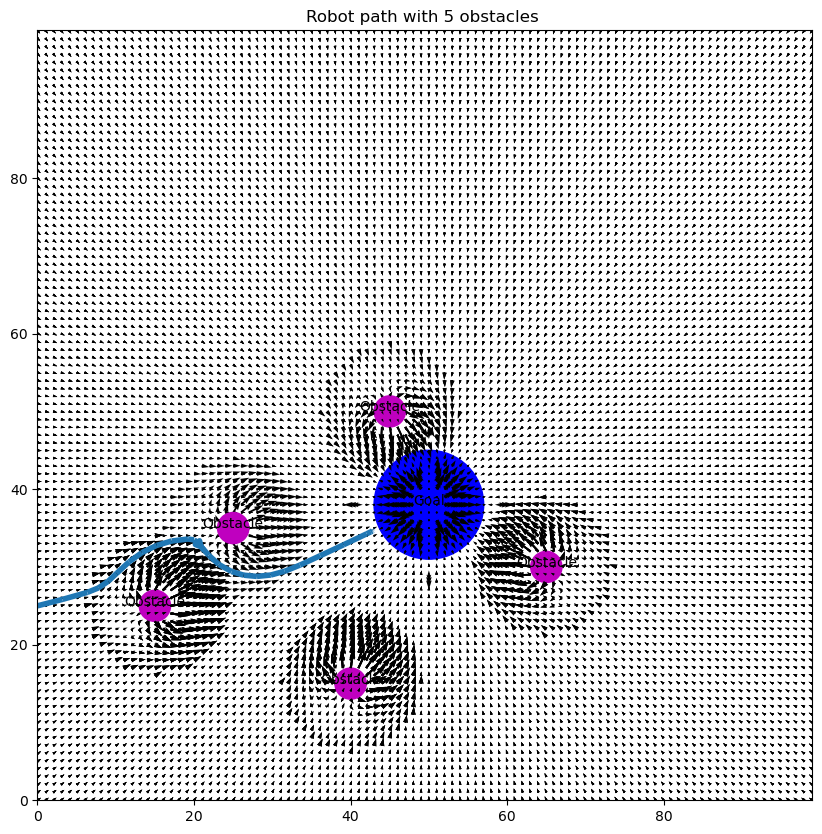

In [14]:
x = np.arange(-0,100,1)
y = np.arange(-0,100,1)
goal = [50,38]
s = 7
r=2
seek_points = np.array([[0,25]]) 
X, Y = np.meshgrid(x,y)
delx, dely =add_goal(X, Y,s, r , goal)

for i in range(5,6):
  fig, ax = plt.subplots(figsize = (10,10))
  for _ in range(1):
    goal = [50,38]
    delx, dely =add_goal(X, Y,s, r , goal)
    
    plot_graph(X, Y, delx, dely , 'Goal',fig, ax, goal, 7,0, 'b' )
    
    for j in range(i):
      k=j
      delx, dely, loc, r = add_obstacle(X,Y, delx,dely,goal)
      plot_graph(X, Y, delx, dely , 'Obstacle',fig, ax, loc, r , j+1,'m')
    ax.streamplot(X,Y,delx,dely, start_points=seek_points,linewidth=4, cmap='autu')
    
plt.show()